# Linear Regression Project: Cinema Sales Prediction

In this project we work with a dataset [available on Kaggle](https://www.kaggle.com/datasets/arashnic/cinema-ticket/data). The data includes information about sale history of movies in cinema halls. The granularity is show time. It means the total sales computed by date, cinema, movie, show time. Also occupation percent (on available cinema capacity) computed at show time. Some tickets might cancelled due to reservation or any other reasons. Some features are provided below:
- film_code : Unique movie id.
- cinema_code : Unique cinema id.
- total_sales : Total sale per screening time.
- ticket_price : Price of ticket at show time.
- tickets_sold : Number of tickets solds

In this project, we suppose that the company is trying to decide whether sales revenew is good enough with respect to the other situations they face. We are here to help them make a data-driven decision.

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Getting the data
**Note:** As mentioned before, the data comes from a dataset freely [available on Kaggle](https://www.kaggle.com/datasets/arashnic/cinema-ticket/data).

In [368]:
data = pd.read_csv('cinemaTicket_Ref.csv')
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [497]:
# checking for dependent column
((data['tickets_sold'] - data['tickets_out']) == data['ticket_use']).all()

np.True_

In [165]:
data.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [167]:
data.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [466]:
# deleting missing values
Cinema_data = data.dropna()
Cinema_data.shape

(142399, 14)

In [519]:
#selecting useful features to predict the total sales
Cinema_data_new = Cinema_data.drop(["film_code", "cinema_code", "date", "ticket_use"], axis =1)
Cinema_data_new.head()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
0,3900000,26,0,4,4.26,150000.0,610.328638,5,2,5
1,3360000,42,0,5,8.08,80000.0,519.801980,5,2,5
2,2560000,32,0,4,20.00,80000.0,160.000000,5,2,5
3,1200000,12,0,1,11.01,100000.0,108.991826,5,2,5
4,1200000,15,0,3,16.67,80000.0,89.982004,5,2,5


In [404]:
Cinema_data_new.describe()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
count,1.423990e+05,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000
mean,1.234773e+07,140.177080,0.237389,3.933883,19.965986,81243.435624,854.723605,6.777218,2.634864,16.112220
std,3.063471e+07,279.709174,2.924231,3.056853,22.653445,33237.373278,953.118103,2.195050,0.809412,8.948638
min,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-2.000000,2.000000,1.000000,1.000000
25%,1.280000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,276.994486,5.000000,2.000000,8.000000
50%,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79459.459459,525.714286,7.000000,3.000000,16.000000
75%,1.112000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,1038.961039,9.000000,3.000000,24.000000
max,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,9692.097160,11.000000,4.000000,31.000000


## Exploratory Data Analysis

First we ask the following question: How are the `total_sales` related to the other factors in the dataset? There doesn't seem to be much correlation between the `total_sales` and `day`, `month` or `quarter`. On the other side, the second chart shows the scatter plot of different factors that truly affects the `total_sales`. `tickets_sold` highly affect the `total_sales`.

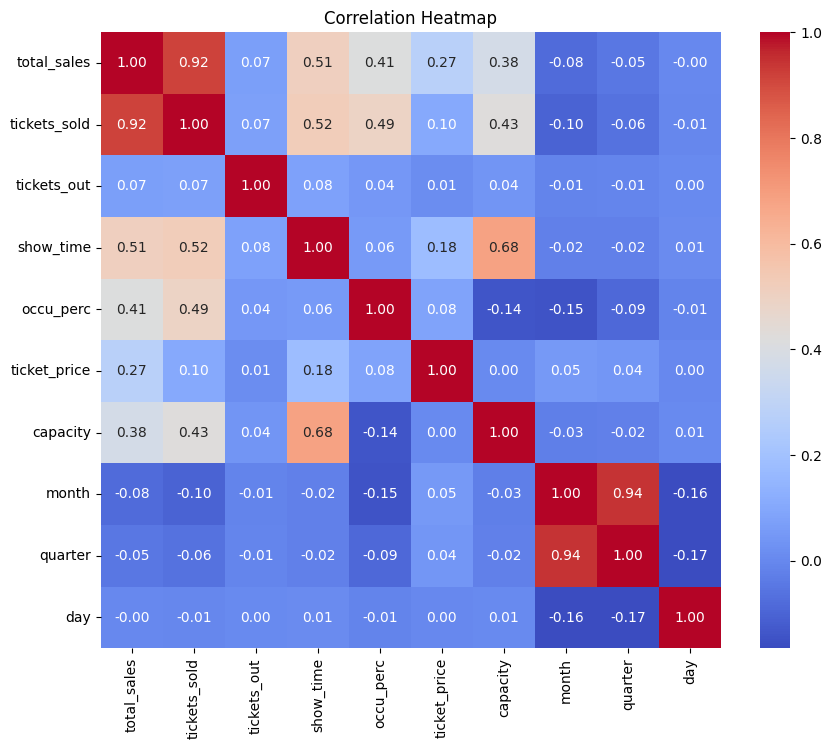

In [499]:
#Correlation Heatmap
corr = Cinema_data_new.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

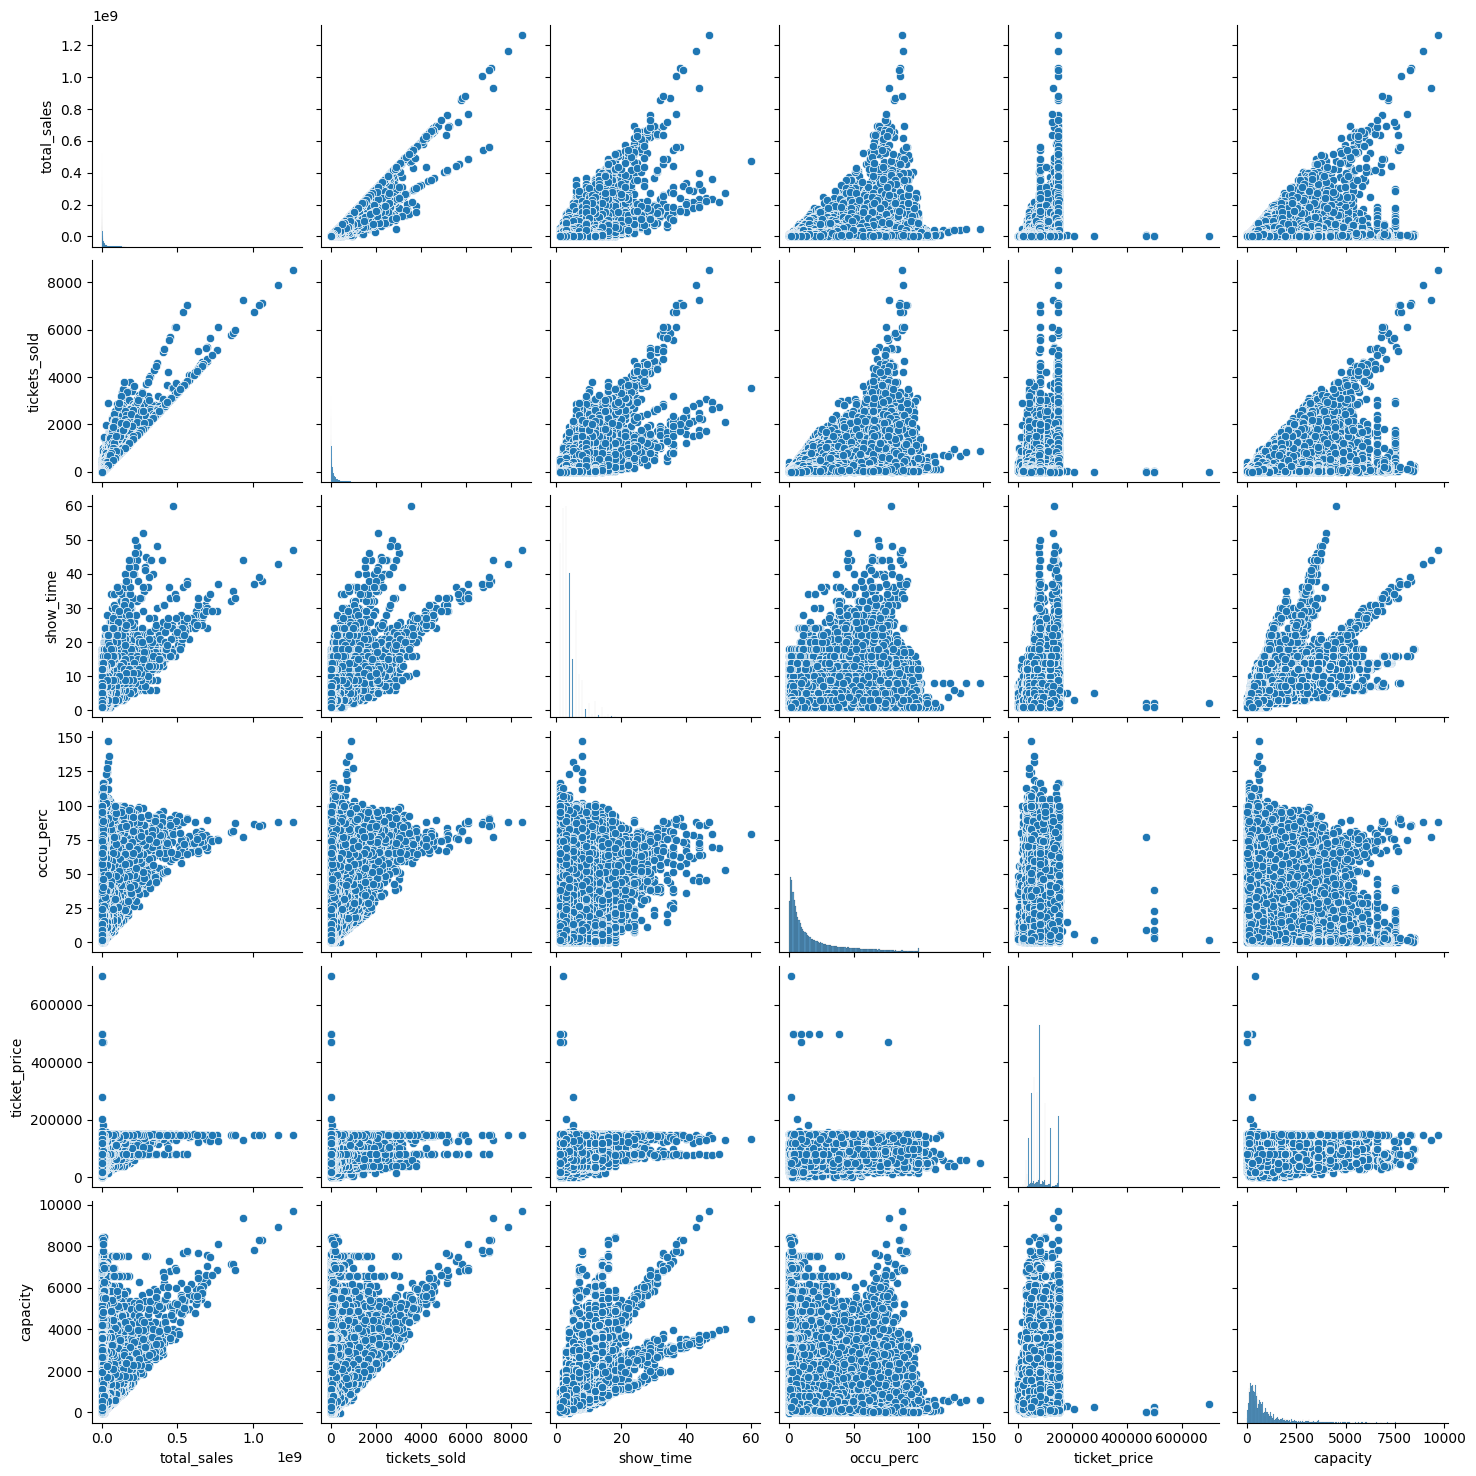

In [406]:

sns.pairplot(Cinema_data_new[["total_sales","tickets_sold", "show_time", "occu_perc","ticket_price","capacity"]], kind='scatter')
plt.show()

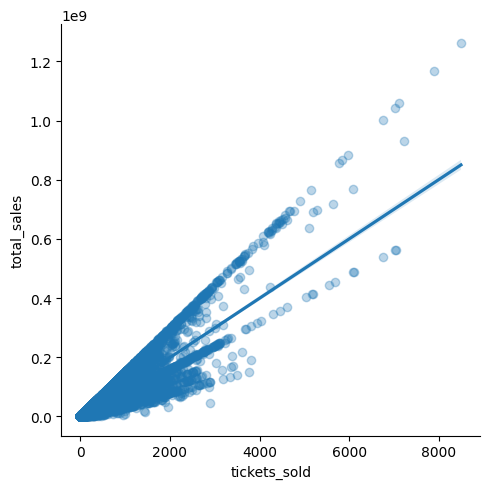

In [407]:
# Regression plot: total_sales vs tickets_sold
sns.lmplot(x='tickets_sold', y='total_sales', data= Cinema_data_new, scatter_kws={'alpha':0.3})

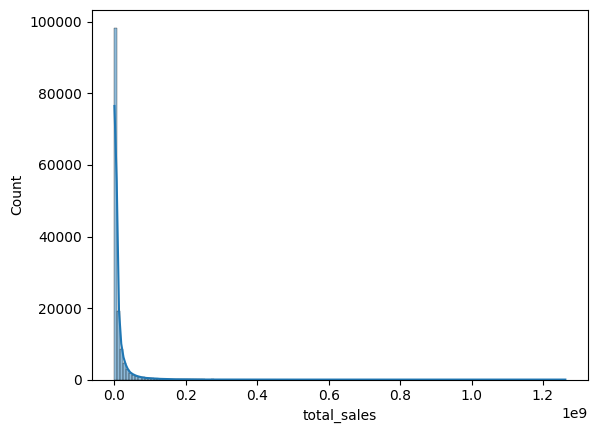

In [481]:
# histogram of target variable
sns.histplot(Cinema_data_new["total_sales"], kde = True, bins = 150)
plt.show()

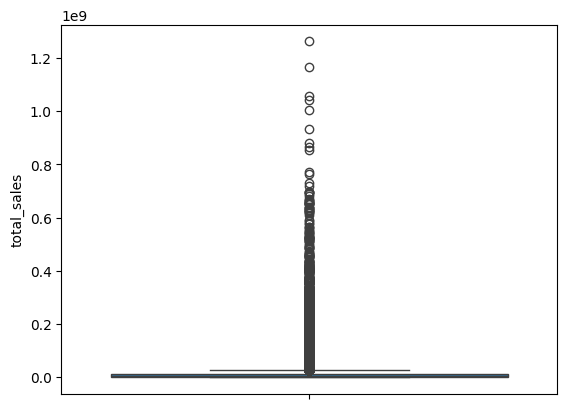

In [176]:
sns.boxplot(Cinema_data_new['total_sales'])
plt.show()

In [408]:
# Detecting the outlier data
# Not much outliers
Cinema_data_new[Cinema_data_new['total_sales']>0.75*1e9]

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
70459,856010000,5781,0,32,80.99,148072.997751,7137.918262,4,2,1
82015,867579993,5850,0,35,81.60,148304.272308,7169.117647,7,3,19
82146,932559980,7229,0,44,77.26,129002.625536,9356.717577,7,3,18
82732,1166354984,7889,0,43,88.19,147845.732539,8945.458669,7,3,13
83307,882394998,5983,0,33,87.08,147483.703493,6870.693615,7,3,6
83899,1262819994,8499,0,47,87.69,148584.538652,9692.097160,7,3,20
89706,764394994,5150,0,29,75.27,148426.212427,6842.035339,8,3,17
90933,1058979995,7121,0,38,85.80,148712.258812,8299.533800,8,3,10
92069,1003694994,6748,0,37,86.20,148739.625667,7828.306265,8,3,3
93047,1042239993,7020,0,39,84.73,148467.235470,8285.141036,7,3,27


In [409]:
# selecting the dependent and traget variables
X = Cinema_data_new[["tickets_sold", "show_time", "occu_perc","ticket_price","capacity"]]
y = Cinema_data_new['total_sales']
X.head()

,tickets_sold,show_time,occu_perc,ticket_price,capacity
0,26,4,4.26,150000.0,610.328638
1,42,5,8.08,80000.0,519.801980
2,32,4,20.00,80000.0,160.000000
3,12,1,11.01,100000.0,108.991826
4,15,3,16.67,80000.0,89.982004


In [410]:
y.head()

0    3900000
1    3360000
2    2560000
3    1200000
4    1200000
Name: total_sales, dtype: int64

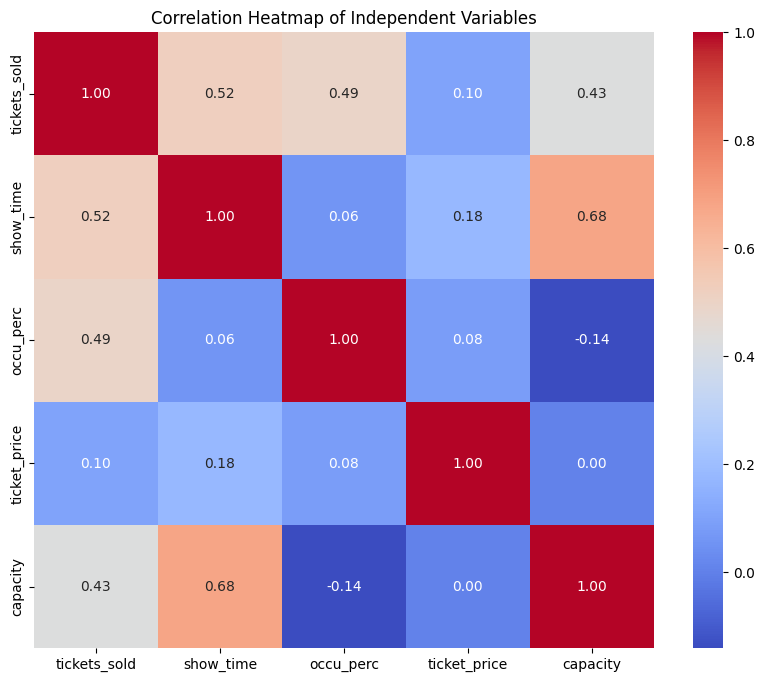

In [520]:
#Correlation Heatmap
corr = X.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Independent Variables')
plt.show()

## Splitting the Data

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model.

In [411]:
from sklearn.model_selection import train_test_split

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [413]:
X_train.head()

,tickets_sold,show_time,occu_perc,ticket_price,capacity
73237,34,6,2.29,70000.0,1484.716157
3208,37,6,1.64,40000.0,2256.097561
91093,31,4,7.05,50000.0,439.716312
46769,6,6,3.85,120000.0,155.844156
130508,120,6,4.22,60000.0,2843.601896


In [414]:
y_train.head()

73237     2380000
3208      1480000
91093     1550000
46769      720000
130508    7200000
Name: total_sales, dtype: int64

## Training the Model with multivariable regression using Scikit Learn

In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output (`total_sales`). As the plots suggested, we find that the most important coefficient is that of the `tickets_sold` predictor. The other factors such as `show_time`, `ticket_price` etc have imapct on the traget but relatively less.

In [415]:
from sklearn.linear_model import LinearRegression

In [416]:
lm = LinearRegression()

In [417]:
lm

LinearRegression()

In [418]:
# Standardizing the dataset for better accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [419]:
# since the target values are large, we are standardizing it too
scaler_y = StandardScaler()
y_train_scale = scaler_y.fit_transform(y_train.to_frame())
y_test_scale = scaler_y.fit_transform(y_test.to_frame())

In [420]:
lm.fit(X_train_scale, y_train_scale)

LinearRegression()

In [421]:
# R-squared value
lm.score(X_train_scale,y_train_scale)

0.8750814291473702

In [422]:
# the coefficients
lm.coef_
X.columns

Index(['tickets_sold', 'show_time', 'occu_perc', 'ticket_price', 'capacity'], dtype='object')

In [423]:
lm.coef_.ravel()

array([ 0.94592317,  0.03044764, -0.07821713,  0.17287447, -0.05911611])

In [424]:
df1 = pd.DataFrame(lm.coef_.ravel(), X.columns)

In [425]:
df2 = pd.DataFrame([lm.intercept_], ["Intercept"])

In [426]:
Coefficients = pd.concat([df2, df1], axis=0)

In [427]:
Coefficients.columns = ["Coeffiecients"]

In [428]:
Coefficients

,Coeffiecients
Intercept,-2.483630e-17
tickets_sold,9.459232e-01
show_time,3.044764e-02
occu_perc,-7.821713e-02
ticket_price,1.728745e-01
capacity,-5.911611e-02


## Training the model with multivariable regression using OLS

Allows us to get more details about the moel

In [429]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train_scale)
model = sm.OLS(y_train_scale, X1)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.396e+05
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:41:44   Log-Likelihood:                -37768.
No. Observations:               99679   AIC:                         7.555e+04
Df Residuals:                   99673   BIC:                         7.560e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.327e-17      0.001   2.08e-14      1.0

### Prediction of Test Data using Linear Regression Model
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [430]:
y_pred = lm.predict(X_test_scale).ravel()
y_pred


array([-0.47544862, -0.27725021, -0.38460467, ...,  1.12328227,
       -0.5618167 , -0.33641921])

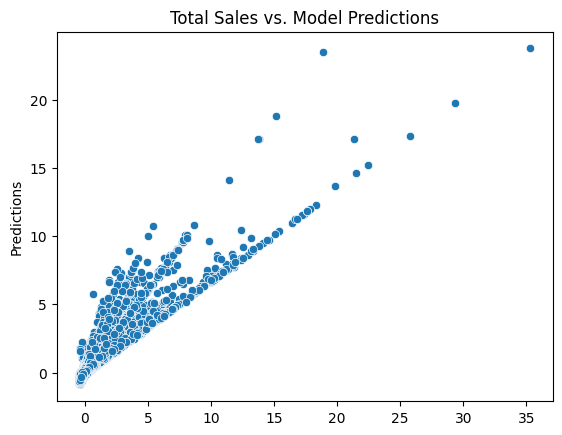

In [431]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x = y_test_scale.ravel(), y = y_pred)
plt.ylabel('Predictions')
plt.title('Total Sales vs. Model Predictions')
plt.show()

### Evaluation of the model

In [510]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

#MSE Value
mse_linear = mean_squared_error(y_test_scale, y_pred)
mse_linear

0.1301912645870578

In [500]:
r2_linear = r2_score(y_test_scale,y_pred)
r2_linear

0.8698087354129422

In [501]:
# MAD value
mad_linear = mean_absolute_error(y_test_scale, y_pred)
mad_linear

0.16087204654770496

### Residuals
Distribution plot of the residuals of the model's predictions. They should be normally distributed.

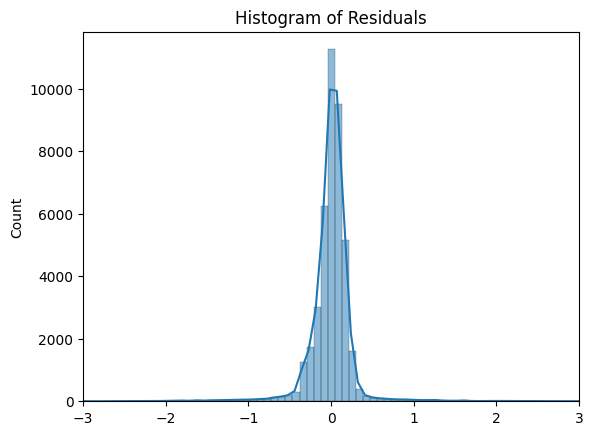

In [477]:
residuals = (y_test_scale.ravel() - y_pred)
sns.histplot(residuals, kde = True, bins = 200)
plt.title("Histogram of Residuals")
plt.xlim(-3,3)
plt.show()

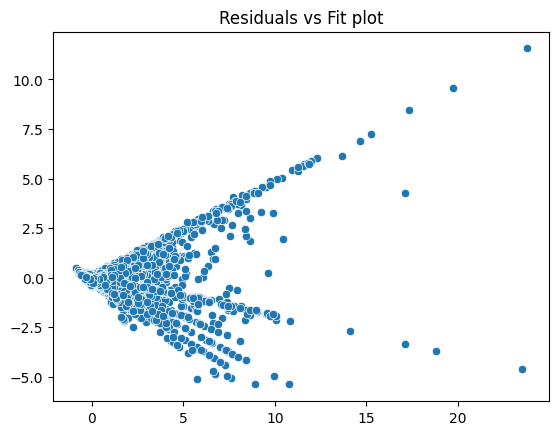

In [436]:
sns.scatterplot(y = residuals, x = y_pred)
plt.title("Residuals vs Fit plot")
plt.show()

## Ridge Regression
We'll implement ridge regression in order to check if we can get a better model

In [437]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [438]:
ridge_regression = Ridge()

In [439]:
parameters = {"alpha" : [1,2,3,5,10,15,20,30,48,60,70]}

In [440]:
ridge_model = GridSearchCV(ridge_regression, param_grid= parameters, scoring= 'neg_mean_squared_error', cv = 5)

In [441]:
ridge_model.fit(X_train_scale, y_train_scale)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 15, 20, 30, 48, 60, 70]},
             scoring='neg_mean_squared_error')

In [442]:
#best alpha parameter
print(ridge_model.best_params_)

{'alpha': 10}


In [443]:
# best score
print(ridge_model.best_score_)

-0.12523213154861376


### Prediction of test data using ridge regression

In [444]:
y_pred_ridge = ridge_model.predict(X_test_scale)
y_pred_ridge

array([-0.47549958, -0.27729101, -0.3846492 , ...,  1.12320174,
       -0.56183467, -0.33645285])

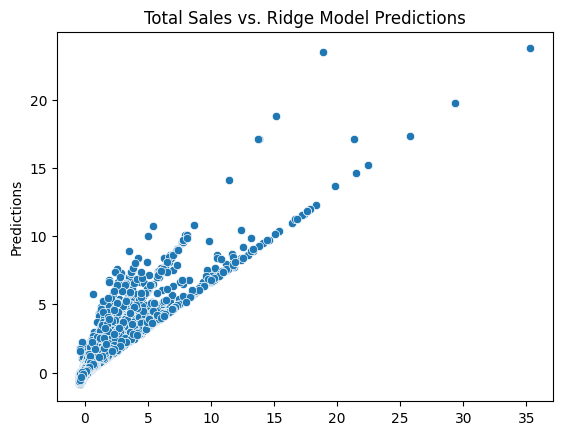

In [445]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x = y_test_scale.ravel(), y = y_pred_ridge)
plt.ylabel('Predictions')
plt.title('Total Sales vs. Ridge Model Predictions')
plt.show()

### Evalution of Ridge Model
We can see in all aspect this model's accuracy is slightly higher than linear regression model

In [502]:
# R-square value
r2_ridge = r2_score( y_test_scale,y_pred_ridge)
r2_ridge

0.8698106075715437

In [503]:
#mse value
mse_ridge = mean_squared_error(y_test_scale, y_pred_ridge)
mse_ridge

0.13018939242845629

In [504]:
#mad value
mad_ridge = mean_absolute_error(y_test_scale, y_pred_ridge)
mad_ridge

0.1608521364897667

### Residuals

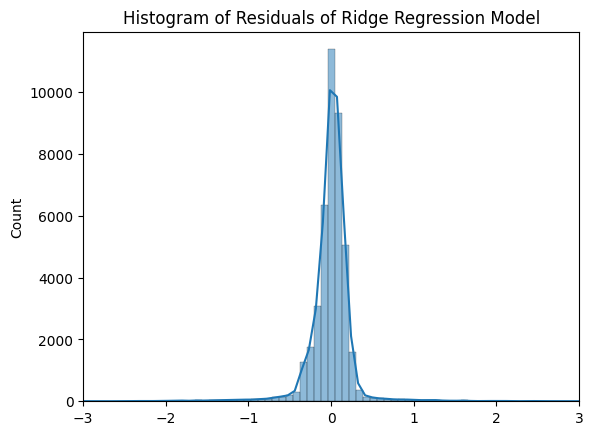

In [483]:
residuals_ridge = y_test_scale.ravel() - y_pred_ridge
sns.histplot(residuals_ridge, kde = True, bins = 200)
plt.title("Histogram of Residuals of Ridge Regression Model")
plt.xlim(-3,3)
plt.show()

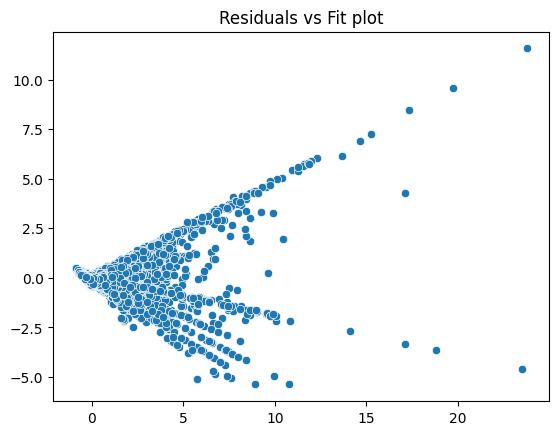

In [450]:
sns.scatterplot(y = residuals_ridge, x = y_pred_ridge)
plt.title("Residuals vs Fit plot")
plt.show()

## Lasso Regression
We'll implement lasso regression in order to check if we can get a better model

In [451]:
from sklearn.linear_model import Lasso

In [452]:
Lasso_regression = Lasso()

In [453]:
Lasso_model = GridSearchCV(Lasso_regression, param_grid= parameters, scoring= 'neg_mean_squared_error', cv = 5)

In [454]:
Lasso_model.fit(X_train_scale, y_train_scale)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 15, 20, 30, 48, 60, 70]},
             scoring='neg_mean_squared_error')

In [455]:
#best alpha value
Lasso_model.best_params_

{'alpha': 1}

In [456]:
print(Lasso_model.best_score_)

-1.0000665507255342


### Prediction of test data using lasso regression

In [457]:
y_pred_lasso = Lasso_model.predict(X_test_scale)
y_pred_lasso

array([9.55193437e-18, 9.55193437e-18, 9.55193437e-18, ...,
       9.55193437e-18, 9.55193437e-18, 9.55193437e-18])

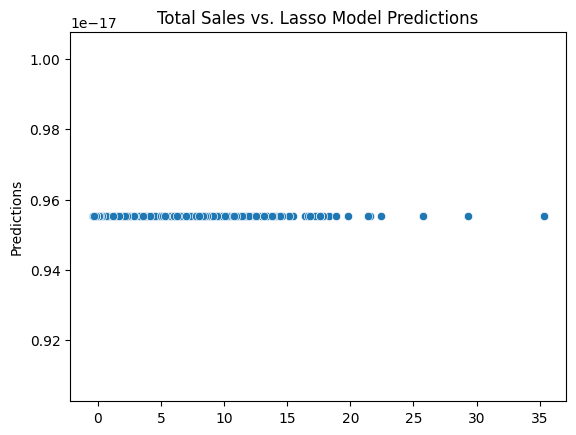

In [458]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x = y_test_scale.ravel(), y = y_pred_lasso)
plt.ylabel('Predictions')
plt.title('Total Sales vs. Lasso Model Predictions')
plt.show()

### Evalution of Lasso Model
We can see in all aspect this model accuracy is very bad

In [506]:
# R - square value
r2_lasso = r2_score(y_test_scale , y_pred_lasso)
r2_lasso

2.220446049250313e-16

In [508]:
# mse
mse_lasso = mean_squared_error(y_test_scale, y_pred_lasso)
mse_lasso

1.0000000000000002

In [509]:
#mad value
mad_lasso = mean_absolute_error(y_test_scale, y_pred_lasso)
mad_lasso

0.4656342074799175

### Residuals

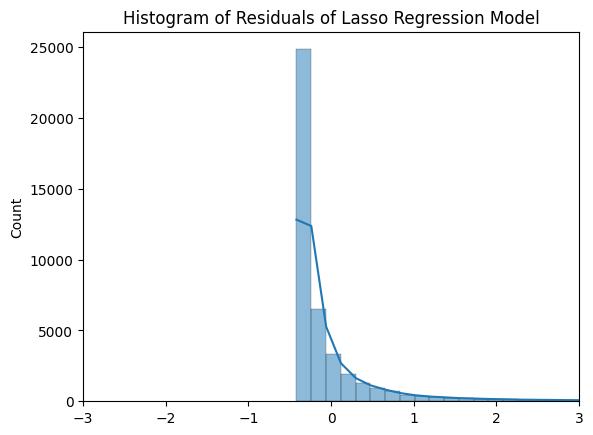

In [517]:
residuals_ridge = y_test_scale.ravel() - y_pred_lasso
sns.histplot(residuals_ridge, kde = True, bins = 200)
plt.title("Histogram of Residuals of Lasso Regression Model")
plt.xlim(-3,3)
plt.show()

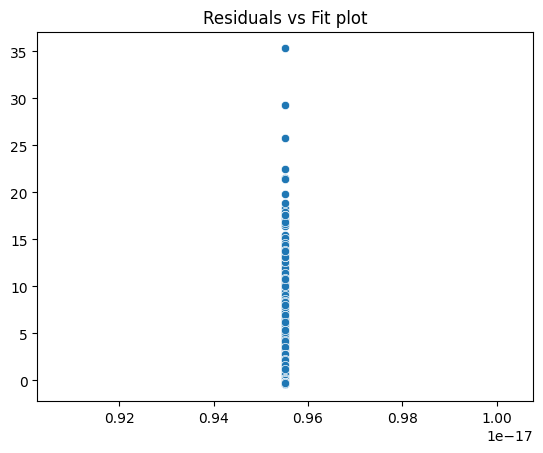

In [518]:
sns.scatterplot(y = residuals_ridge, x = y_pred_lasso)
plt.title("Residuals vs Fit plot")
plt.show()

## Conclusion 

In [516]:
Accuracy = np.array([
    ["Linear Regression", r2_linear, mse_linear, mad_linear],
    ["Ridge Regression", r2_ridge, mse_ridge, mad_ridge],
    ["Lasso Regression", r2_lasso, mse_lasso, mad_lasso]
])
Model_Accuracy = pd.DataFrame(Accuracy, columns=["Model", "R2", "MSE", "MAD"])
Model_Accuracy

,Model,R2,MSE,MAD
0,Linear Regression,0.8698087354129422,0.1301912645870578,0.16087204654770496
1,Ridge Regression,0.8698106075715437,0.13018939242845629,0.1608521364897667
2,Lasso Regression,2.220446049250313e-16,1.0000000000000002,0.4656342074799175


Similar to the general idea, we see that `tickets_sold` highly affects the `total_sales` in the study. There're other features such as `tickets_out`, `show_time`, `ticket_price`, `capacity` etc that can help to predict the total sales in cinema hall for a particular cinema. However, some features such as `month`, `quarter`, `day` are of no use to us since they have near 0 correlation with the total sales. Note that, `month` and `quarter` highly affect each other. Also, we see that deducting `tickets_out` from `tickets_sold` we get `ticket_use`. So, `ticket_use` is basically a dependent feature.
Keeping these factors in mind we get our independent features X and target feature y (`total_sales`). 

For the large values and higher accuracy of the model we `StandardScale` the data.

We fit the linear regression model on the training data and got a nearly good r-square value of 87% same as the adjusted r - square value. It means all the features are used. The test dataset also emits a similar result of r-square value of 86.9%. So, we can say that the model neither overfit or underfit. It is a more or less general model. The residual plot also shows a near standard normal curve. 

Proceeding in the ridge regresion, at `alpha == 2` we get the best ridge model. Here, the accuracy is very slight ammount high (almost same). We see that both linear and ridge regression model almost works fine.
However, in case of Lasso regresion, the best model comes at `alpha == 1`, but the model is very poor in all aspects. Also the residual plot is nowhere normal shaped.